<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/FD_Shi_Tomasi_CornerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter,


We will see the function: **cv2.goodFeaturesToTrack()**

In last chapter, we saw Harris Corner Detector. Later in 1994, J. Shi and C. Tomasi made a small modification to it in their paper Good Features to Track which shows better results compared to Harris Corner Detector. The scoring function in Harris Corner Detector was given by:

R = $\lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2$

Instead of this, Shi-Tomasi proposed:

R = $min(\lambda_1, \lambda_2)$

If it is a greater than a threshold value, it is considered as a corner. If we plot it in $\lambda_1 - \lambda_2$ space as we did in Harris Corner Detector, we get an image as below:

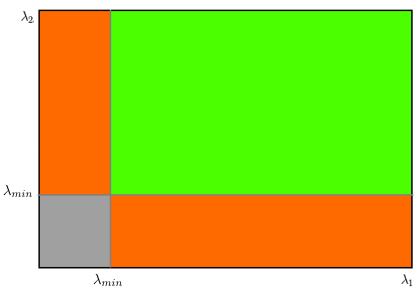

From the figure, you can see that only when $\lambda_1 and \lambda_2$ are above a minimum value, $\lambda_{min}$, it is conidered as a corner(green region).



OpenCV has a function, cv2.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it). As usual, image should be a grayscale image. Then you specify number of corners you want to find. Then you specify the quality level, which is a value between 0-1, which denotes the minimum quality of corner below which everyone is rejected. Then we provide the minimum euclidean distance between corners detected.

With all these informations, the function finds corners in the image. All corners below quality level are rejected. Then it sorts the remaining corners based on quality in the descending order. Then function takes first strongest corner, throws away all the nearby corners in the range of minimum distance and returns N strongest corners.

In below example, we will try to find 25 best corners:

In [1]:
!wget https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png
import cv2
import numpy as np
import numpy as np
import cv2
import sys
import dlib
from PIL import Image
import cv2
import dlib
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt



--2021-10-24 16:53:38--  https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png
Resolving w7.pngwing.com (w7.pngwing.com)... 172.67.214.225, 104.21.16.171, 2606:4700:3035::6815:10ab, ...
Connecting to w7.pngwing.com (w7.pngwing.com)|172.67.214.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370 (2.3K) [image/png]
Saving to: ‘png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png’

png-transparent-che 100%[===================>]   2.31K  --.-KB/s    in 0s      

2021-10-24 16:53:39 (36.1 MB/s) - ‘png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png’ saved [2370/2370]



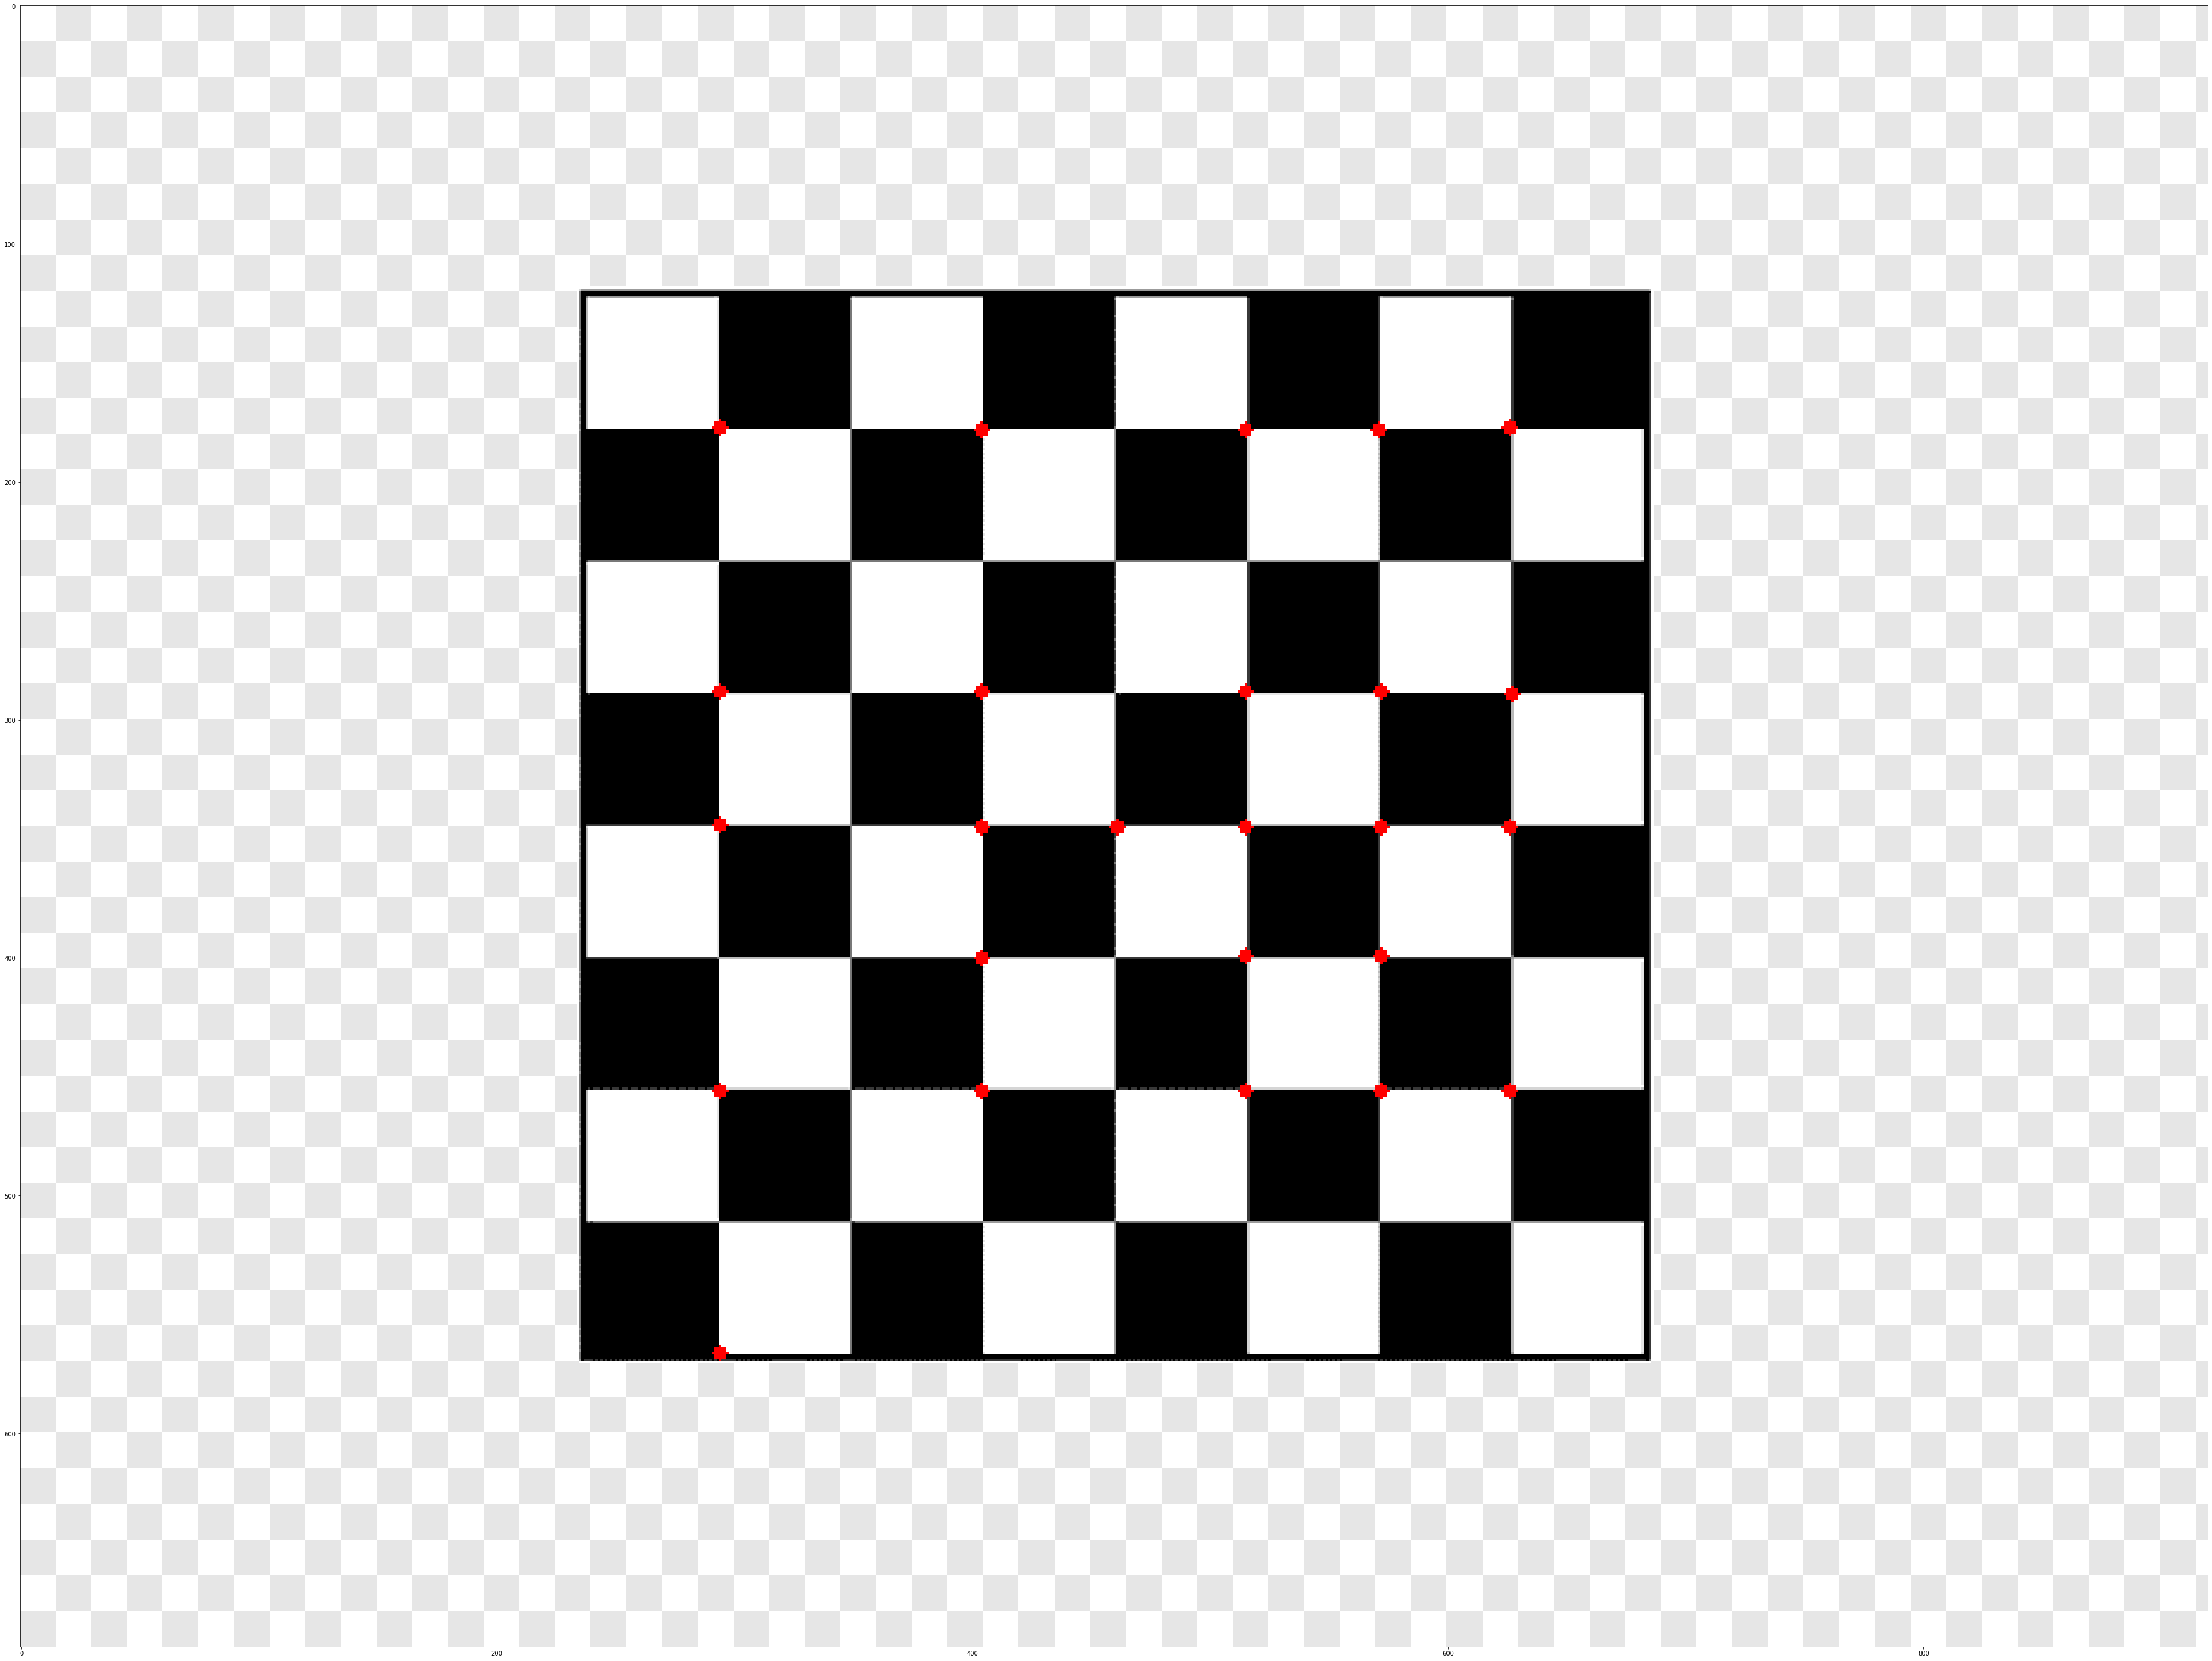

In [5]:

plt.rcParams['figure.figsize'] = [100, 50]
filename = '/content/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)
plt.show()